In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
import os
%cd drive/My\ Drive
!ls

/content/drive/My Drive
'Colab Notebooks'
'Getting started.pdf'
 glove.6B.100d.txt
 glove.6B.200d.txt
 glove.6B.300d.txt
 glove.6B.50d.txt
 glove.6B.zip
 input_data.xlsx
 Mahima-07-05-2020.wav
'Mahima Sehgal Automation Deliverable - QA Test Writing.gsheet'
 Sarcasm_Headlines_Dataset.json
 testrail-import-trial_proj-2020-05-22.cfg


In [11]:
import pandas as pd
df = pd.read_excel (r'input_data.xlsx')
print (df)

                                      Short description  ... Assignment group
0                                           login issue  ...            GRP_0
1                                               outlook  ...            GRP_0
2                                    cant log in to vpn  ...            GRP_0
3                         unable to access hr_tool page  ...            GRP_0
4                                          skype error   ...            GRP_0
...                                                 ...  ...              ...
8495                  emails not coming in from zz mail  ...           GRP_29
8496                           telephony_software issue  ...            GRP_0
8497  vip2: windows password reset for tifpdchb pedx...  ...            GRP_0
8498                     machine nÃ£o estÃ¡ funcionando  ...           GRP_62
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...           GRP_49

[8500 rows x 4 columns]


In [145]:
df.shape

(8360, 6)

In [5]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [6]:
df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_35       1
GRP_67       1
GRP_70       1
GRP_64       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


**PRE-PROCESSING STEPS**
- Replacing Nan Values with Blank text string
- Grouping The Groups with less than 20 Tickets to seperate group
- Removing Duplicate Rows
- Group Description, Short Description and Caller to one group
- Text pre-processing on new text field

In [12]:
#Before Removing Nan
df.describe().transpose()

,count,unique,top,freq
Short description,8492,7481,password reset,38
Description,8499,7817,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


In [13]:
df[df.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [0]:
import numpy as np
# Replace all Nan entries with empty string
df = df.replace(np.nan, '', regex=True)

In [15]:
#After Removing Nan
df.describe().transpose()

,count,unique,top,freq
Short description,8500,7482,password reset,38
Description,8500,7818,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


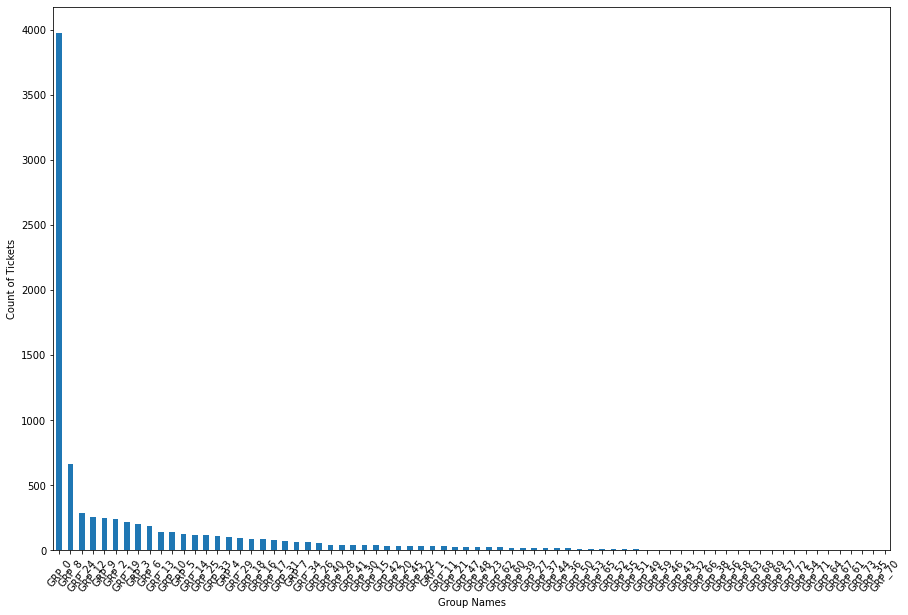

In [23]:
# Groupby by Group ID
group_df = df.groupby("Assignment group")
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
group_df.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Group Names")
plt.ylabel("Count of Tickets")
plt.show()

In [17]:
#Combining Groups with less tickets
small_df = df[df.groupby('Assignment group')['Assignment group'].transform('size') < 10]
small_df.describe()


,Short description,Description,Caller,Assignment group
count,87,87,87,87
unique,86,86,73,25
top,product selector not working,update cutview to lauacyltoe hxgaycze version ...,lenxvcbq vwnhjtoi,GRP_52
freq,2,2,5,9


,Short description,Description,Caller,Assignment group
401,need access to erp kp06789,need access to kp06789 to enter forecast for i...,etvendormhd xpslzunb,GRP_35
461,"hpqc delivers error message: ""user is not main...",my user id: thrydksd'\niÂ´m involved in uat ua...,iavozegx jpcudyfi,GRP_38
626,production order number issue,\n\nreceived from: zuxcfonv.nyhpkrbe@gmail.com...,zuxcfonv nyhpkrbe,GRP_43
841,error with customization (engineering tool) - ...,"hi team, \n\ni need your help with two error t...",qasdhyzm yuglsrwx,GRP_46
1143,please redirect to local it: word document 134...,das folgende word-dokument kann nicht mehr bea...,cwtrgeup nxctkmzo,GRP_49


In [0]:
#Assigining these to a seperate group altogether
df.loc[df.groupby('Assignment group')['Assignment group'].transform('size') < 15 , 'Assignment group'] =  'SUBGROUP-X'

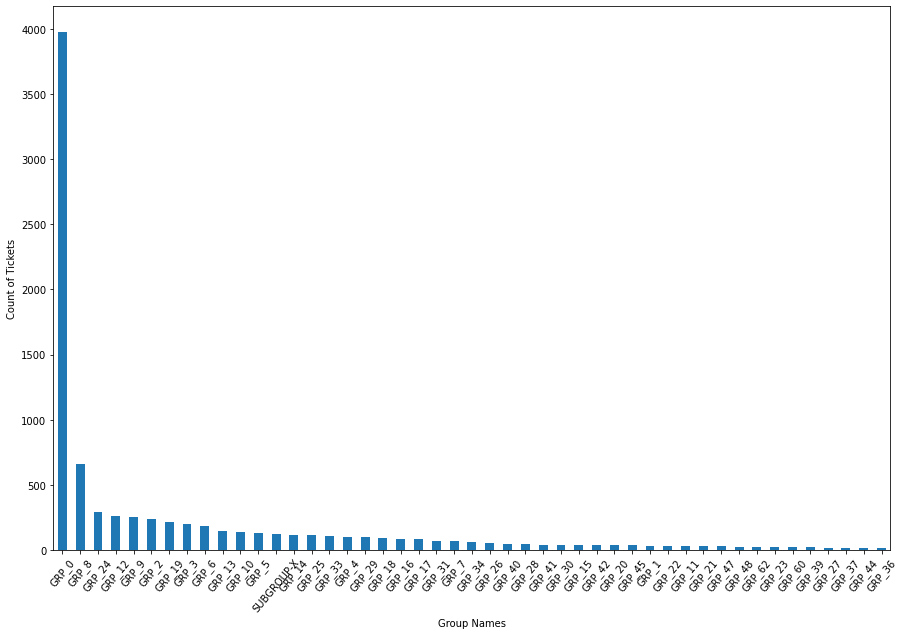

In [26]:
# Groupby by Group ID
group_df = df.groupby("Assignment group")
plt.figure(figsize=(15,10))
group_df.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Group Names")
plt.ylabel("Count of Tickets")
plt.show()

In [0]:
#Remove Duplicate Rows
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF.head()
df.drop_duplicates(keep=False,inplace=True)

In [29]:
df.describe()

,Short description,Description,Caller,Assignment group
count,8360,8360,8360,8360
unique,7440,7783,2944,47
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,34,771,3908


In [0]:
#Combine Text Fields
df['Final Description'] = df['Short description'].str.cat(df['Description'],sep=" ")
df['Final Description'] = df['Final Description'].str.cat(df['Caller'],sep=" ")

In [79]:
df['Final Description'].head()

0    login issue -verified user details.(employee# ...
1    outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2    cant log in to vpn \r\n\r\nreceived from: eylq...
3    unable to access hr_tool page unable to access...
4          skype error  skype error  owlgqjme qhcozdfx
Name: Final Description, dtype: object

In [0]:
## Decontract the words
import re
def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"cant", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text



In [80]:
df['Final Description'] = df['Final Description'].apply(lambda x: decontract(x))
df.head()

,Short description,Description,Caller,Assignment group,Final Description,Description Clean
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue verified user details employee ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,outlook received from hmjdrvpb komuaywn ...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,can not log in to vpn \r\n\r\nreceived from: e...,cant log in to vpn received from eylqgodm...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error owlgqjme qhcozdfx,skype error skype error owlgqjme qhcozdfx


In [0]:
# Data Normalization
import re
def  clean_text(df, text_field, new_text_field_name):
    #convert to lower case
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    #remove single letters
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\b[a-zA-Z]\b", "", elem))  
    return df

In [81]:
df_clean = clean_text(df, 'Final Description', 'Description Clean')
df_clean


,Short description,Description,Caller,Assignment group,Final Description,Description Clean
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue verified user details employee ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,outlook received from hmjdrvpb komuaywn ...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,can not log in to vpn \r\n\r\nreceived from: e...,can not log in to vpn received from eylqg...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error owlgqjme qhcozdfx,skype error skype error owlgqjme qhcozdfx
...,...,...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail \r\n\r\nrece...,emails not coming in from zz mail received...
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue telephony_software is...,telephony software issue telephony software is...
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2: windows password reset for tifpdchb pedx...,vip windows password reset for tifpdchb pedxr...
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine est funcionando am unable to acc...


In [82]:
df_clean = df_clean.drop(['Short description', 'Description','Caller','Final Description'], axis=1)
df_clean.head()

,Assignment group,Description Clean
0,GRP_0,login issue verified user details employee ...
1,GRP_0,outlook received from hmjdrvpb komuaywn ...
2,GRP_0,can not log in to vpn received from eylqg...
3,GRP_0,unable to access hr tool page unable to access...
4,GRP_0,skype error skype error owlgqjme qhcozdfx


There are 2112476 words in the combination of all review.


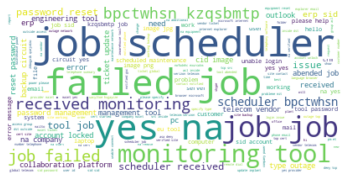

In [83]:
#Showcase Word Cloud
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator


text = " ".join(review for review in df_clean['Description Clean'])
print ("There are {} words in the combination of all review.".format(len(text)))
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [109]:
# Data Cleaning -- Removing Stop words
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
newStopWords = ["na","sid","cid","null","hi","png","eu","hello"]
stop.extend(newStopWords)

df_clean['Description Clean'] = df_clean['Description Clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_clean.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Assignment group,Description Clean
0,GRP_0,login issue verified user details employee man...
1,GRP_0,outlook received hmjdrvpb komuaywn com team me...
2,GRP_0,log vpn received eylqgodm ybqkwiam com cannot ...
3,GRP_0,unable access hr tool page unable access hr to...
4,GRP_0,skype error skype error owlgqjme qhcozdfx


There are 1528328 words in the combination of all review.


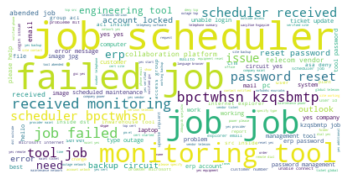

In [108]:
text = " ".join(review for review in df_clean['Description Clean'])
print ("There are {} words in the combination of all review.".format(len(text)))
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [110]:
# Getting Word Tokens
import nltk 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
df_clean['Description Clean Tokens'] = df_clean['Description Clean'].apply(lambda x: word_tokenize(x))
df_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Assignment group,Description Clean,Description Clean Tokens
0,GRP_0,login issue verified user details employee man...,"[login, issue, verified, user, details, employ..."
1,GRP_0,outlook received hmjdrvpb komuaywn com team me...,"[outlook, received, hmjdrvpb, komuaywn, com, t..."
2,GRP_0,log vpn received eylqgodm ybqkwiam com cannot ...,"[log, vpn, received, eylqgodm, ybqkwiam, com, ..."
3,GRP_0,unable access hr tool page unable access hr to...,"[unable, access, hr, tool, page, unable, acces..."
4,GRP_0,skype error skype error owlgqjme qhcozdfx,"[skype, error, skype, error, owlgqjme, qhcozdfx]"


In [0]:
#Stemming Fine word stems 
from nltk.stem import PorterStemmer
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text
df_clean['Description Stem'] = df_clean['Description Clean Tokens'].apply(lambda x: word_stemmer(x))


In [113]:
#Lemmatization Find word Lemmas
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
df_clean['Description lemma'] = df_clean['Description Stem'].apply(lambda x: word_lemmatizer(x))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [115]:
#POS Tagging
def word_pos_tagger(text):
    pos_tagged_text = nltk.pos_tag(text)
    return pos_tagged_text
nltk.download('averaged_perceptron_tagger')
df_clean['Description POS'] = df_clean['Description Clean Tokens'].apply(lambda x: word_pos_tagger(x))
df_clean.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Assignment group,Description Clean,Description Clean Tokens,Description Stem,Description lemma,Description POS
0,GRP_0,login issue verified user details employee man...,"[login, issue, verified, user, details, employ...","[login, issu, verifi, user, detail, employe, m...","[login, issu, verifi, user, detail, employe, m...","[(login, JJ), (issue, NN), (verified, VBD), (u..."
1,GRP_0,outlook received hmjdrvpb komuaywn com team me...,"[outlook, received, hmjdrvpb, komuaywn, com, t...","[outlook, receiv, hmjdrvpb, komuaywn, com, tea...","[outlook, receiv, hmjdrvpb, komuaywn, com, tea...","[(outlook, NN), (received, VBD), (hmjdrvpb, JJ..."
2,GRP_0,log vpn received eylqgodm ybqkwiam com cannot ...,"[log, vpn, received, eylqgodm, ybqkwiam, com, ...","[log, vpn, receiv, eylqgodm, ybqkwiam, com, ca...","[log, vpn, receiv, eylqgodm, ybqkwiam, com, ca...","[(log, NN), (vpn, NN), (received, VBD), (eylqg..."
3,GRP_0,unable access hr tool page unable access hr to...,"[unable, access, hr, tool, page, unable, acces...","[unabl, access, hr, tool, page, unabl, access,...","[unabl, access, hr, tool, page, unabl, access,...","[(unable, JJ), (access, NN), (hr, NN), (tool, ..."
4,GRP_0,skype error skype error owlgqjme qhcozdfx,"[skype, error, skype, error, owlgqjme, qhcozdfx]","[skype, error, skype, error, owlgqjm, qhcozdfx]","[skype, error, skype, error, owlgqjm, qhcozdfx]","[(skype, JJ), (error, NN), (skype, NN), (error..."


**Defining Train and Test Data**

In [0]:

from sklearn.model_selection import train_test_split
X = df_clean['Description Clean']
y = df['Assignment group']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)



**Using TFIDF for Model**

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score


tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)
X_vector = tfidf_vectorizer.transform(X_train)
X_vector_test = tfidf_vectorizer.transform(X_test)

X_vector_train, X_val, y_vector_train, y_val = train_test_split(
    X_vector, y_train, train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_vector_train, y_vector_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))


Accuracy for C=0.01: 0.4988038277511962
Accuracy for C=0.05: 0.5328947368421053
Accuracy for C=0.25: 0.5520334928229665
Accuracy for C=0.5: 0.5879186602870813
Accuracy for C=1: 0.6208133971291866


In [146]:
final_tfidf = LogisticRegression(C=1)
final_tfidf.fit(X_vector, y_train)
#print ("Final Accuracy: %s" 
#       % accuracy_score(y_test, final_tfidf.predict(X_vector_test)))
accuracy = accuracy_score(y_test, final_tfidf.predict(X_vector_test))
recall = recall_score(y_test, final_tfidf.predict(X_vector_test),average='weighted')
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Accuracy': accuracy, 'Recall': recall})
resultsDf = resultsDf[['Method', 'Accuracy', 'Recall']]
resultsDf

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Method,Accuracy,Recall
0,Logistic Regression,0.686005,0.686005


**Using SVM For the Model**

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(X_train)
X_vector = ngram_vectorizer.transform(X_train)
X_vector_test = ngram_vectorizer.transform(X_test)

X_vector_train, X_val, y_vector_train, y_val = train_test_split(
    X_vector, y_train, train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_vector_train, y_vector_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))


Accuracy for C=0.01: 0.6273923444976076
Accuracy for C=0.05: 0.6650717703349283


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy for C=0.25: 0.6680622009569378
Accuracy for C=0.5: 0.6686602870813397
Accuracy for C=1: 0.6680622009569378


In [148]:
final_svm_ngram = LinearSVC(C=0.25)
final_svm_ngram.fit(X_vector, y_train)

#print ("Final Accuracy: %s" 
#       % accuracy_score(y_test, final_svm_ngram.predict(X_vector_test)))

accuracy = accuracy_score(y_test, final_svm_ngram.predict(X_vector_test))
recall = recall_score(y_test, final_svm_ngram.predict(X_vector_test),average='weighted')


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [149]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVM'], 'Accuracy': [accuracy], 'Recall': [recall]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy,Recall
0,Logistic Regression,0.686005,0.686005
0,SVM,0.693780,0.693780


**n-Grams Model**


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(X_train)
X_vector = ngram_vectorizer.transform(X_train)
X_vector_test = ngram_vectorizer.transform(X_test)

X_vector_train, X_val, y_vector_train, y_val = train_test_split(
    X_vector, y_train, train_size = 0.75
)


    


In [0]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c)
    lr.fit(X_vector_train, y_vector_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))
    

In [152]:
final_ngram = LogisticRegression(C=0.5)
final_ngram.fit(X_vector, y_train)

#print ("Final Accuracy: %s" 
#       % accuracy_score(y_test, final_ngram.predict(X_vector_test)))
accuracy = accuracy_score(y_test, final_ngram.predict(X_vector_test))
recall = recall_score(y_test, final_ngram.predict(X_vector_test),average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [153]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['N-Gram'], 'Accuracy': [accuracy], 'Recall': [recall]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy,Recall
0,Logistic Regression,0.686005,0.686005
0,SVM,0.693780,0.693780
0,N-Gram,0.682416,0.682416


In [0]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_vector, y_train)
pred_RF = rfcl.predict(X_vector_test)
accuracy = accuracy_score(y_test, pred_RF)
recall = recall_score(y_test, pred_RF, average="weighted")

In [156]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'Accuracy': [accuracy], 'Recall': [recall]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy,Recall
0,Logistic Regression,0.686005,0.686005
0,SVM,0.693780,0.693780
0,N-Gram,0.682416,0.682416
0,Random Forest,0.650120,0.650120


**LSTM **

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_features = 10000


In [160]:
maxlen = 0
for row in df_clean['Description Stem']:
  row_length = len(row)
  if maxlen < row_length:
    maxlen = row_length

print (maxlen)

923


In [0]:

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df_clean['Description Stem'].values)

In [169]:
X = tokenizer.texts_to_sequences(df_clean['Description Stem'].values)
X = pad_sequences(X, maxlen = maxlen)

## Perform lable encoder... and convert to catagorical.. 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_clean['Assignment group'])
y_enc = le.transform(df_clean['Assignment group'])

print("Number of Samples:", len(X))
#print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 8360
Number of Labels:  8360
GRP_0


In [170]:
y_enc

array([ 0,  0,  0, ...,  0, 42, 46])

In [171]:
Y = pd.get_dummies(y_enc).values
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [173]:
Y[0].shape

(47,)

In [174]:
Y = pd.get_dummies(y_enc).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6688, 923) (6688, 47)
(1672, 923) (1672, 47)


In [175]:
len(tokenizer.word_index)

16638

In [0]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, TimeDistributed
from tensorflow.keras.models import Model, Sequential


In [0]:
num_words=len(tokenizer.word_index) + 1
embedding_size = 200

In [194]:
model = Sequential()
model.add(Embedding(num_words,embedding_size,input_length=maxlen )) #10000 for vocab size, 8 for dimensionality of embedding
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(5, 64)))
model.add(TimeDistributed(Dense(100)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(250, activation='relu'))
model.add(Dense(47, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 923, 200)          3327800   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 923, 128)          135680    
_________________________________________________________________
time_distributed_3 (TimeDist (None, 923, 100)          12900     
_________________________________________________________________
flatten_3 (Flatten)          (None, 92300)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 92300)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 250)               23075250  
_________________________________________________________________
dense_11 (Dense)             (None, 47)               

In [195]:
import time
batch_size = 100
epochs = 5
print('Train...')
start = time.clock()
model.fit(X_train, Y_train, batch_size=batch_size, epochs=5, validation_data=[X_test, Y_test], validation_split=0.2, verbose=2)
end = time.clock()
print('Time spent:', end-start)

Train...
Epoch 1/5
54/54 - 231s - loss: 2.6279 - acc: 0.4585 - val_loss: 2.1633 - val_acc: 0.4529
Epoch 2/5
54/54 - 223s - loss: 1.7984 - acc: 0.4697 - val_loss: 1.8047 - val_acc: 0.4544
Epoch 3/5
54/54 - 223s - loss: 1.3683 - acc: 0.4703 - val_loss: 1.8182 - val_acc: 0.4529
Epoch 4/5
54/54 - 226s - loss: 1.0818 - acc: 0.4729 - val_loss: 1.8622 - val_acc: 0.4798
Epoch 5/5
54/54 - 222s - loss: 0.7637 - acc: 0.7163 - val_loss: 2.0619 - val_acc: 0.5725
Time spent: 2222.338948


In [197]:
score = model.evaluate(X_test, Y_test)
print('\nVaidation Acc: %.2f%%' %(score[1]*100))

53/53 [==============================] - 17s 328ms/step - loss: 1.8802 - acc: 0.6053

Vaidation Acc: 60.53%
